# 이상한 annotation 찾기

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import shutil
import json
import cv2

In [14]:
def print_bbox(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_name = img_path.split('/')[-1]
    font = cv2.FONT_HERSHEY_SIMPLEX

    with open('/data/ephemeral/home/datasets/jsons/train_null_extracted.json', 'r') as gt_json:
        data = json.load(gt_json)
        words = data['images'][img_name]['words']
        for word_id, word_data in words.items():
            points = np.array(word_data.get('points', []))
            points = np.round(points).astype(np.int32).reshape((-1, 2))
            cv2.polylines(img, [points], True, color=(255, 0, 0), thickness=4)
            cv2.putText(img, f'{int(word_id)}', (points[0][0], points[0][1]-10), font, 0.5, (255, 0, 0), 2)


    cv2.putText(img, 'annotation', (50, 50), font, 1, (255, 0, 0), 3)
    plt.figure(figsize=(10, 10))
    plt.title(img_name)
    plt.imshow(img)
    plt.show()
    

In [15]:
img_list = glob.glob("/data/ephemeral/home/datasets/images/train/*.jpg")
img_list.sort()
img_list[:10]

['/data/ephemeral/home/datasets/images/train/drp.en_ko.in_house.selectstar_000003.jpg',
 '/data/ephemeral/home/datasets/images/train/drp.en_ko.in_house.selectstar_000005.jpg',
 '/data/ephemeral/home/datasets/images/train/drp.en_ko.in_house.selectstar_000006.jpg',
 '/data/ephemeral/home/datasets/images/train/drp.en_ko.in_house.selectstar_000008.jpg',
 '/data/ephemeral/home/datasets/images/train/drp.en_ko.in_house.selectstar_000009.jpg',
 '/data/ephemeral/home/datasets/images/train/drp.en_ko.in_house.selectstar_000010.jpg',
 '/data/ephemeral/home/datasets/images/train/drp.en_ko.in_house.selectstar_000011.jpg',
 '/data/ephemeral/home/datasets/images/train/drp.en_ko.in_house.selectstar_000012.jpg',
 '/data/ephemeral/home/datasets/images/train/drp.en_ko.in_house.selectstar_000014.jpg',
 '/data/ephemeral/home/datasets/images/train/drp.en_ko.in_house.selectstar_000015.jpg']

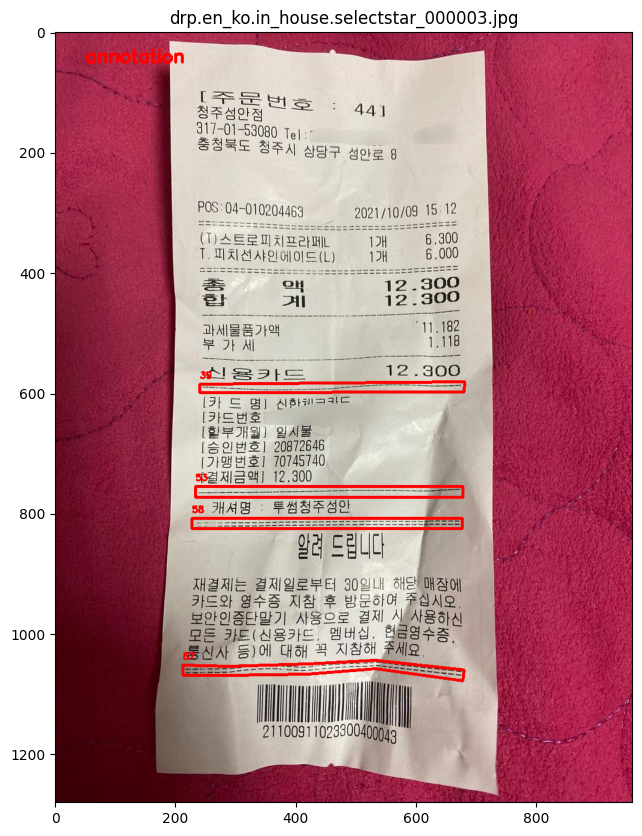

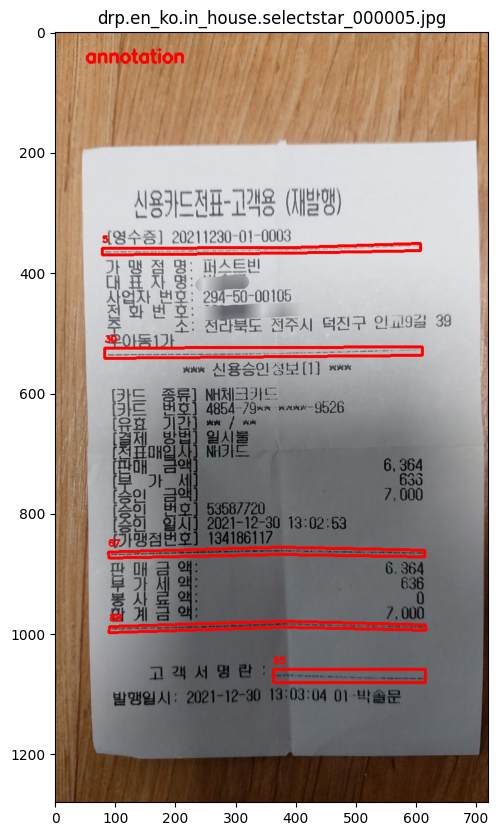

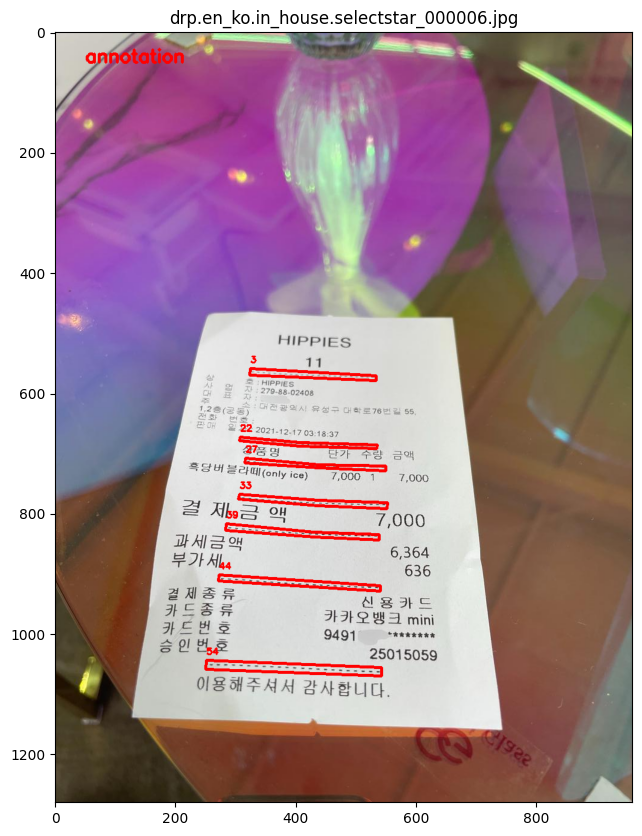

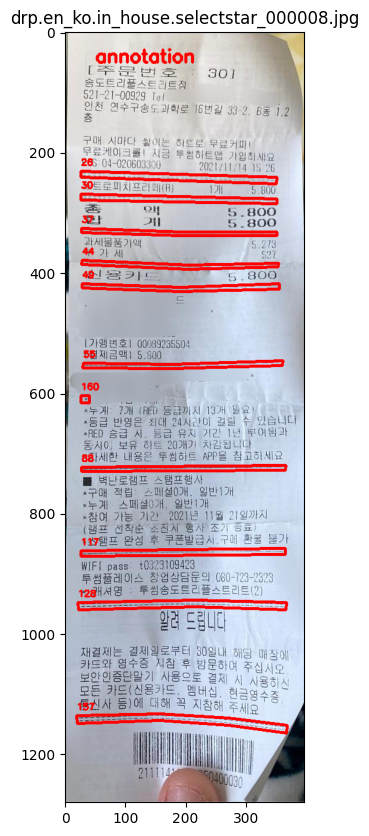

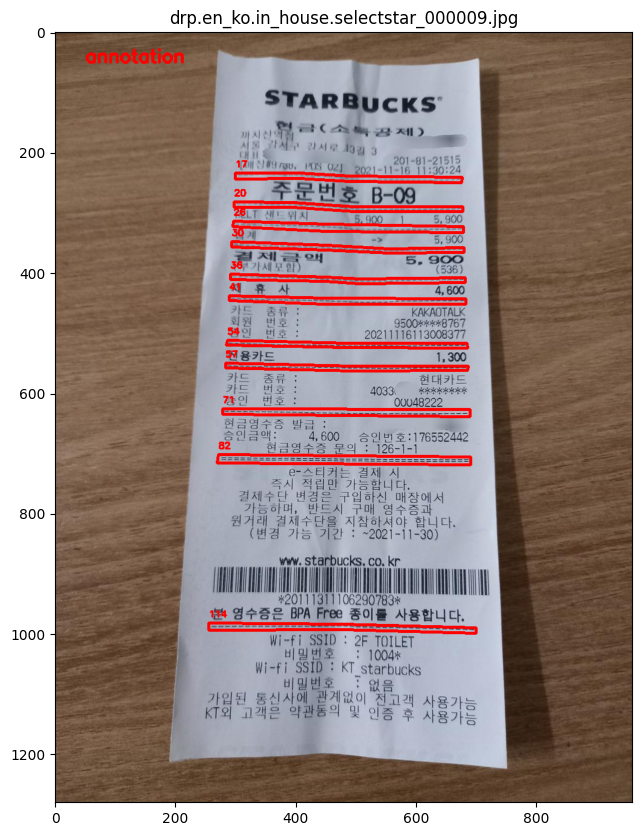

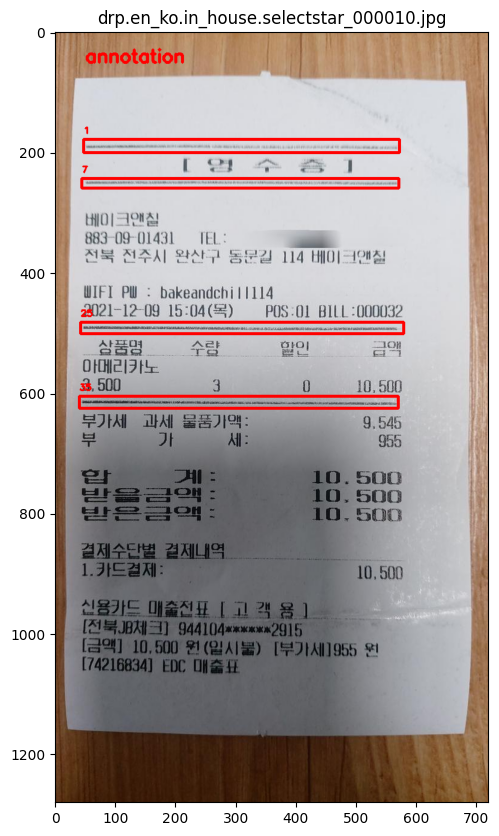

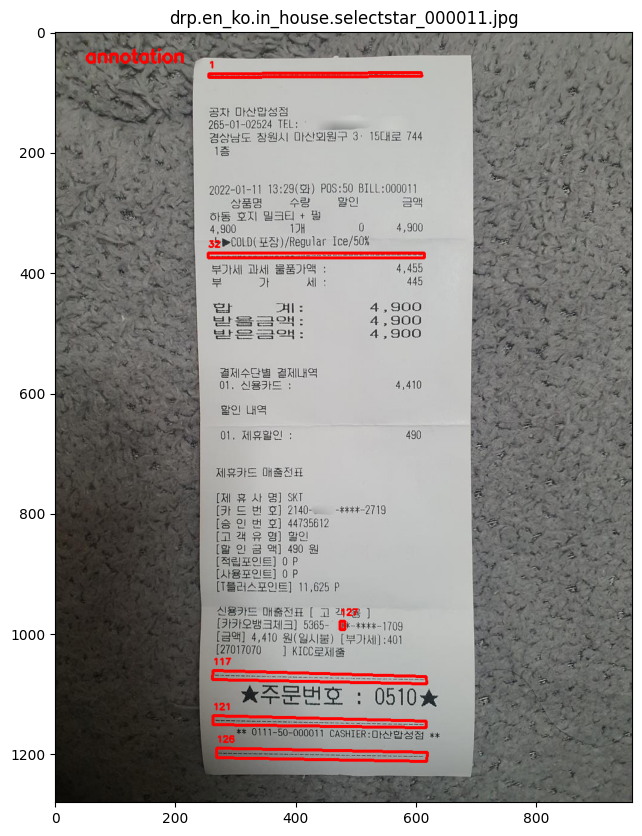

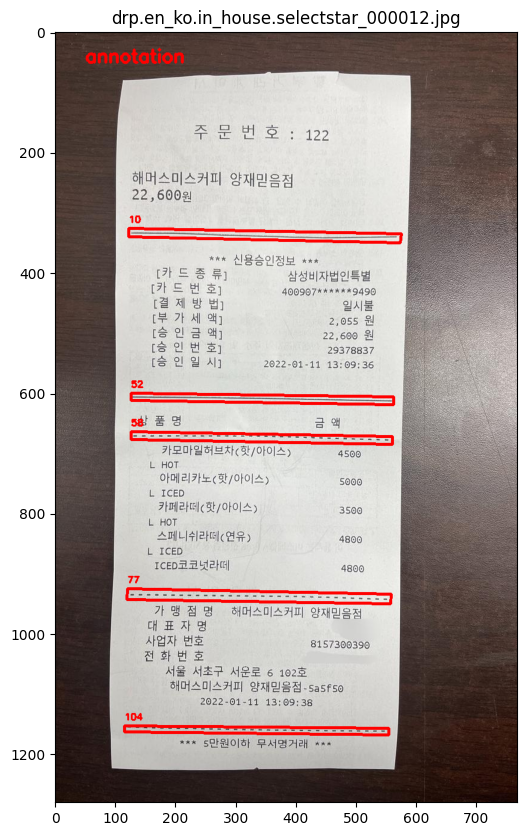

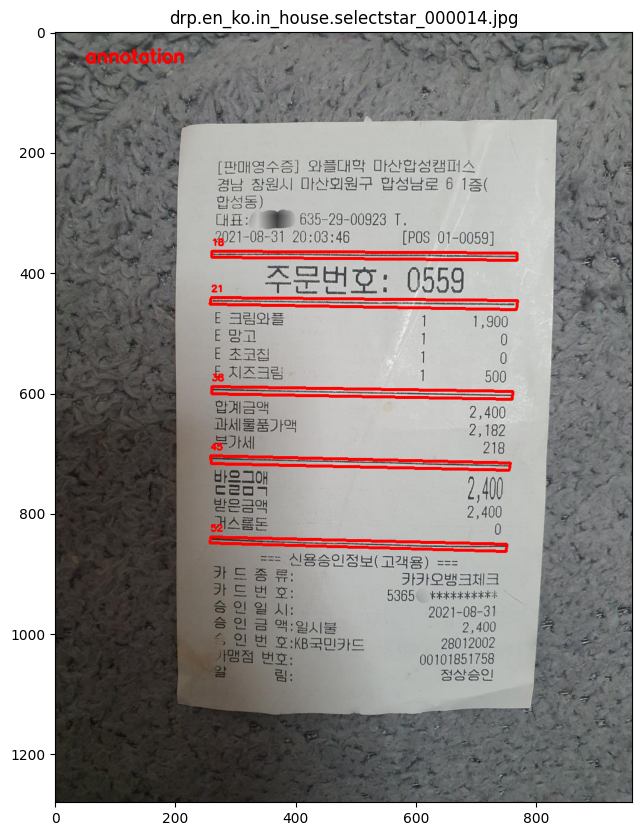

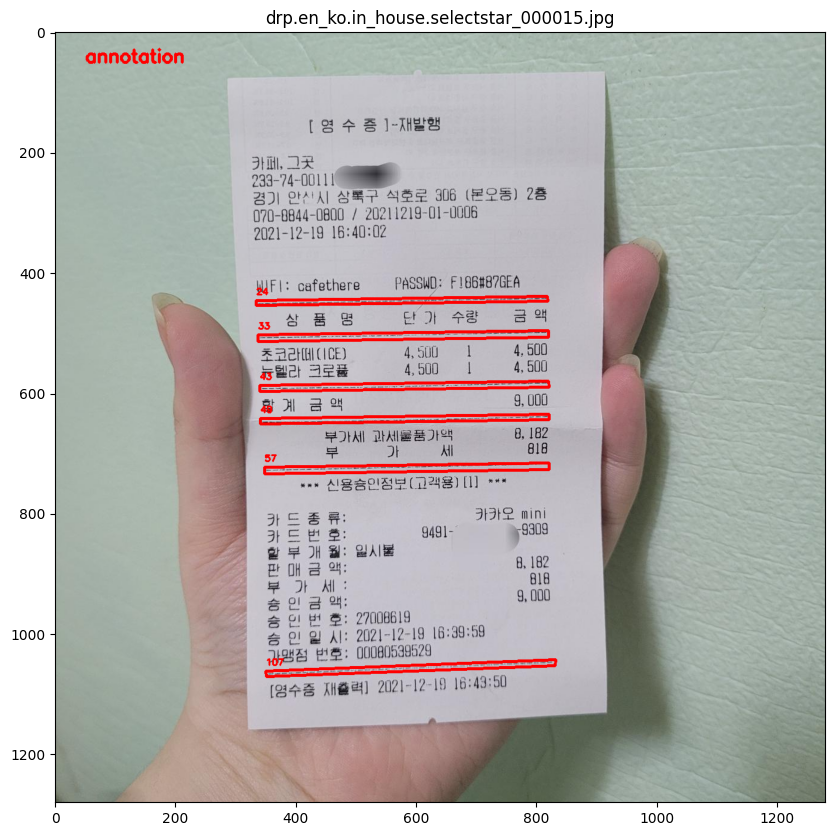

In [26]:
for i in range(10):
    print_bbox(img_list[i])